# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
from db_connection.connection import PostgresConnection
from sklearn.decomposition import PCA


## Initialize and connect to the PostgreSQL database


In [2]:
db = PostgresConnection()
db.connect()

Connected to PostgreSQL Database!


## Define a query to fetch data from the xdr_data table

In [3]:
query = "SELECT * FROM xdr_data;"


# Fetch data into a DataFrame

In [4]:
df = db.fetch_data(query)


c:\Users\habteyes.asfaw\10Accadamy\TellCo-Telecom-User-Analytics\db_connection\connection.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, self.conn)


### Display the first few rows of the fetched data


In [5]:

df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Close the connection


In [6]:
db.close()


Connection closed.


# Data Overview and Cleaning


## Display basic info and statistics


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


# Check for missing values

In [8]:
# Check for missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
def handle_missing_values(df):
    """
    Handle missing values by replacing them with the column means for numeric columns.
    """
    # Only apply the fillna() with mean to numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    return df

## Drop rows with missing values


In [10]:
df_cleaned = df.dropna()


## Fill missing values in categorical columns with the mode


In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_14320\4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
# Verify changes
print(df.isnull().sum())


Bearer Id                                      991
Start                                            0
Start ms                                         1
End                                              0
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                               0
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Analysis of top 10 handsets


In [13]:
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


# Identify the top 3 handset manufacturers


In [14]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


## Create a dictionary to store top 5 handsets per manufacturer


In [15]:
top_5_handsets_per_manufacturer = {}

for manufacturer in top_3_manufacturers.index:
    # Filter data for each manufacturer and find top 5 handsets
    top_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_handsets

# Display results
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nTop 5 handsets for {manufacturer}:\n{handsets}")


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


## Aggregate User Behavior on Mobile Applications

In [16]:
# Define application columns
app_columns = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'YouTube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}


In [17]:
# Initialize a DataFrame to store aggregated statistics
app_usage_stats = pd.DataFrame(columns=['sessions', 'total_duration', 'total_dl_data', 'total_ul_data', 'total_data'])

# Iterate through each application and calculate metrics
for app_name, columns in app_columns.items():
    # Filter rows with non-zero values for the application
    app_df = df[(df[columns[0]] > 0) | (df[columns[1]] > 0)]
    
    # Aggregate metrics
    app_usage_stats.loc[app_name] = {
        'sessions': app_df.shape[0],
        'total_duration': app_df['Dur. (ms)'].sum(),
        'total_dl_data': app_df[columns[0]].sum(),
        'total_ul_data': app_df[columns[1]].sum(),
        'total_data': app_df[columns[0]].sum() + app_df[columns[1]].sum()
    }

# Display aggregated statistics
print(app_usage_stats)


              sessions  total_duration  total_dl_data  total_ul_data  \
Social Media    150001    1.569128e+10   2.693001e+11   4.939298e+09   
Google          150001    1.569128e+10   8.626186e+11   3.084833e+11   
Email           150001    1.569128e+10   2.687611e+11   7.010648e+10   
YouTube         150001    1.569128e+10   1.745123e+12   1.651423e+12   
Netflix         150001    1.569128e+10   1.744039e+12   1.650274e+12   
Gaming          150001    1.569128e+10   6.330713e+13   1.243268e+12   
Other           150001    1.569128e+10   6.316550e+13   1.239728e+12   

                total_data  
Social Media  2.742394e+11  
Google        1.171102e+12  
Email         3.388676e+11  
YouTube       3.396545e+12  
Netflix       3.394314e+12  
Gaming        6.455040e+13  
Other         6.440523e+13  


# Implement User Behavior Aggregation for Task 1.1

##  Aggregate Data Per User

In [18]:
# Aggregate data per user
user_behavior = df.groupby('IMSI').agg(
    num_sessions=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_dl_data=('Total DL (Bytes)', 'sum'),
    total_ul_data=('Total UL (Bytes)', 'sum')
)

In [19]:
# Aggregate data for each application
for app_name, columns in app_columns.items():
    user_behavior[f'{app_name} DL (Bytes)'] = df.groupby('IMSI')[columns[0]].sum()
    user_behavior[f'{app_name} UL (Bytes)'] = df.groupby('IMSI')[columns[1]].sum()


In [20]:
# Calculate total data volume for each application
for app_name in app_columns.keys():
    user_behavior[f'{app_name} Total Data (Bytes)'] = user_behavior[f'{app_name} DL (Bytes)'] + user_behavior[f'{app_name} UL (Bytes)']
# Display aggregated user behavior data
print(user_behavior.head())


              num_sessions  total_duration  total_dl_data  total_ul_data  \
IMSI                                                                       
2.040471e+14             1        869844.0     78697597.0     60456049.0   
2.040808e+14             1        877385.0    194828056.0     37295915.0   
2.082001e+14             1         86019.0     31376981.0     53794658.0   
2.082001e+14             1         86254.0    392918313.0     33583272.0   
2.082001e+14             2        573923.0    961767023.0     71325004.0   

              Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                             
2.040471e+14                1500145.0                  45943.0   
2.040808e+14                 668596.0                  46628.0   
2.082001e+14                3073697.0                  49084.0   
2.082001e+14                2542767.0                  34337.0   
2.082001e+14                3326811.0                  99905.0   

    

# Conduct Exploratory Data Analysis for Task 1.2 

## 1. Describe Relevant Variables and Data Types


In [21]:
# Display data types and basic information about the dataset
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

## 2. Variable Transformations


In [22]:
# Calculate total data volume per user
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [23]:
# Compute total duration and data per user
user_data = df.groupby('IMSI').agg(
    total_duration=('Dur. (ms)', 'sum'),
    total_data=('Total Data (Bytes)', 'sum')
).reset_index()

In [24]:
# Segment users into decile classes based on total duration
user_data['Decile Class'] = pd.qcut(user_data['total_duration'], 10, labels=False) + 1

# Compute total data per decile class
decile_data = user_data.groupby('Decile Class').agg(
    total_duration=('total_duration', 'sum'),
    total_data=('total_data', 'sum')
)

print(decile_data)

              total_duration    total_data
Decile Class                              
1               2.146076e+08  5.457884e+12
2               4.282643e+08  6.105181e+12
3               7.566384e+08  6.554138e+12
4               1.067191e+09  6.177730e+12
5               8.561879e+08  5.070381e+12
6               1.255856e+09  6.452409e+12
7               1.582296e+09  6.176211e+12
8               1.874601e+09  7.843097e+12
9               2.492958e+09  9.330793e+12
10              5.125177e+09  1.491535e+13


## 3. Basic Metrics Analysis


In [25]:
# Convert columns to numeric types if necessary
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_14320\3290799496.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [26]:
# Example cleaning function
def clean_numeric_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace(',', '').str.replace('$', '')
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Clean columns that should be numeric
numeric_columns = [
    'Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
    'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
    'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
    '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
    'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
    'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)',
    'Total DL (Bytes)', 'Total Data (Bytes)'
]

# Apply cleaning function to numeric columns
for col in numeric_columns:
    clean_numeric_column(df, col)


In [27]:
# Fill missing values with a specific value (e.g., 0) or use another method as needed
df.fillna(0, inplace=True)  # Example: fill NaNs with 0

# Optionally, drop columns with too many missing values
df.dropna(axis=1, thresh=0.9*len(df), inplace=True)  # Example: drop columns with more than 10% NaN values


In [28]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['float64'])

# Calculate basic metrics
metrics = numeric_df.agg(['mean', 'median', 'std', 'min', 'max'])
print(metrics)

           Bearer Id    Start ms      End ms     Dur. (ms)          IMSI  \
mean    1.007189e+19  499.184872  498.797555  1.046079e+05  2.074105e+14   
median  7.349883e+18  499.000000  500.000000  8.639900e+04  2.082015e+14   
std     2.998300e+18  288.613750  288.099572  8.103780e+04  1.281002e+13   
min     0.000000e+00    0.000000    0.000000  0.000000e+00  0.000000e+00   
max     1.318654e+19  999.000000  999.000000  1.859336e+06  2.140743e+14   

        MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean     4.158517e+10  4.828970e+13        89.425810        14.387971   
median   3.366361e+10  3.572151e+13        38.000000         4.000000   
std      2.438734e+12  2.257219e+13       560.968602        76.837168   
min      0.000000e+00  0.000000e+00         0.000000         0.000000   
max      8.823971e+14  9.900120e+13     96923.000000      7120.000000   

        Avg Bearer TP DL (kbps)  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
mean               13299

## 4. Non-Graphical Univariate Analysis


In [29]:
# Compute dispersion parameters
dispersion_params = df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
print(dispersion_params)


        Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
mean        4.546404e+08      4.112093e+07        4.957613e+08
median      4.558409e+08      4.114324e+07        4.968610e+08
std         2.441449e+08      1.127685e+07        2.443843e+08
var         5.960672e+16      1.271673e+14        5.972371e+16
min         0.000000e+00      0.000000e+00        0.000000e+00
max         9.029696e+08      7.833131e+07        9.559848e+08


## 5. Graphical Univariate Analysis


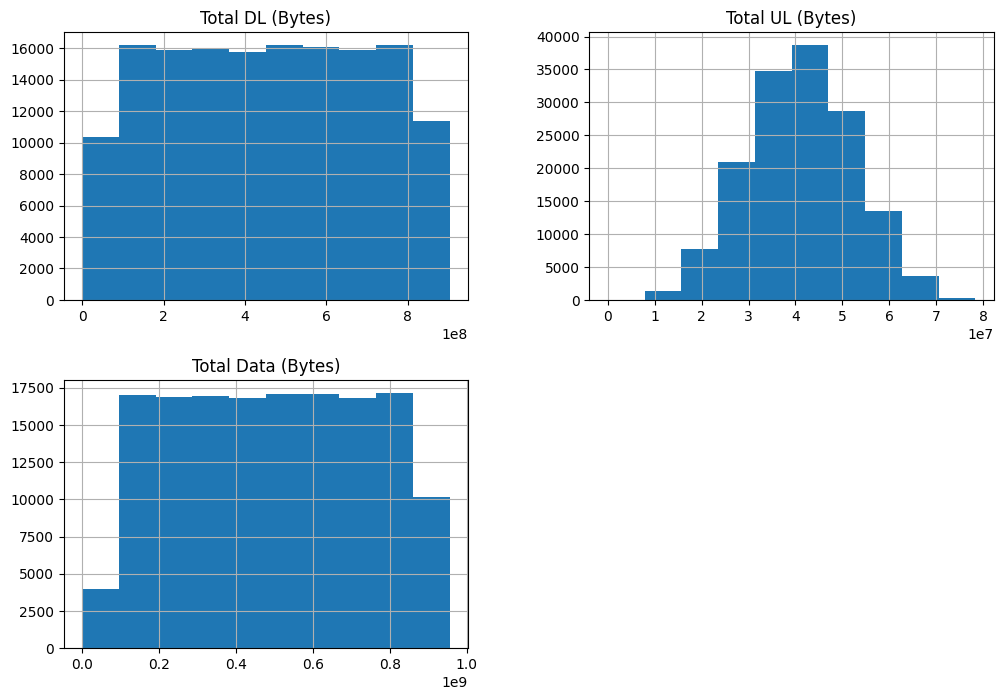

In [30]:
# Plot histograms for key variables
df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']].hist(figsize=(12, 8))
plt.show()

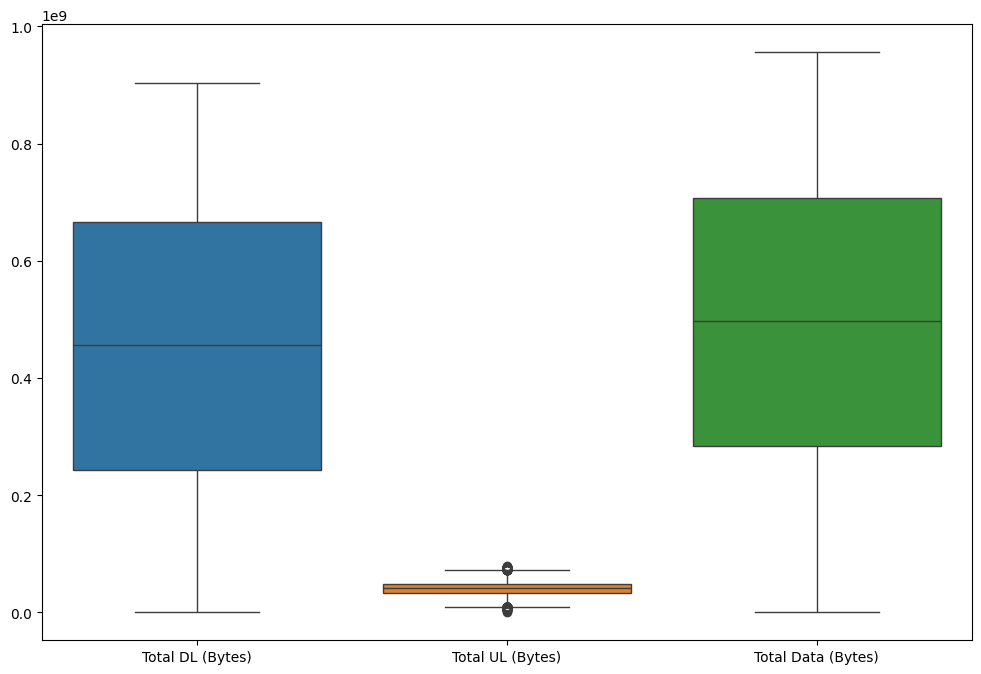

In [31]:
# Plot boxplots for key variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']])
plt.show()

## 6. Bivariate Analysis

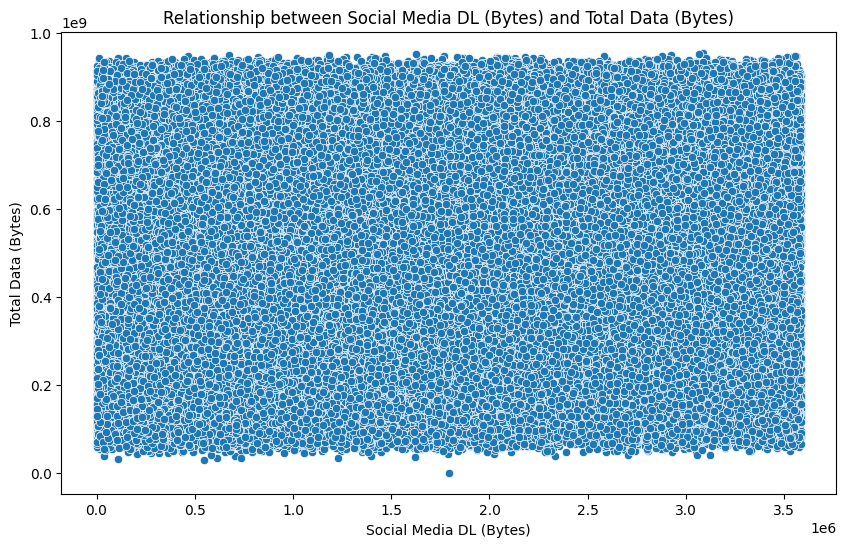

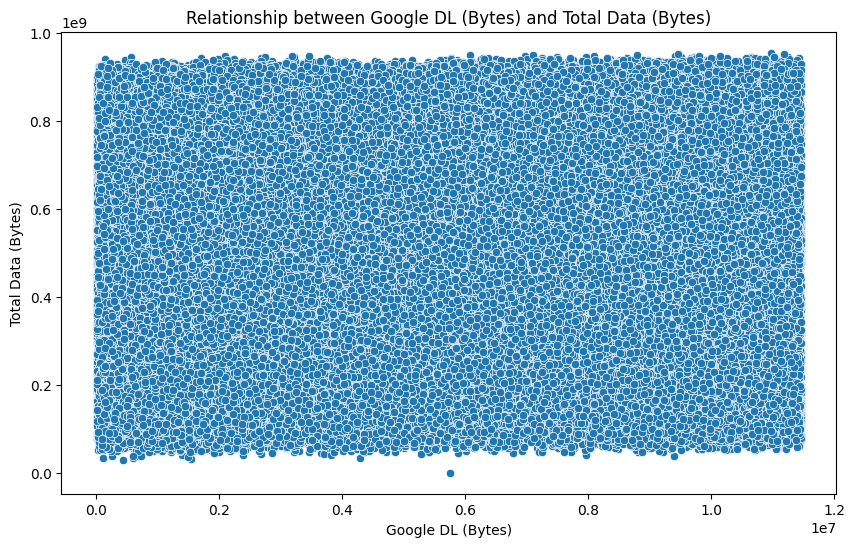

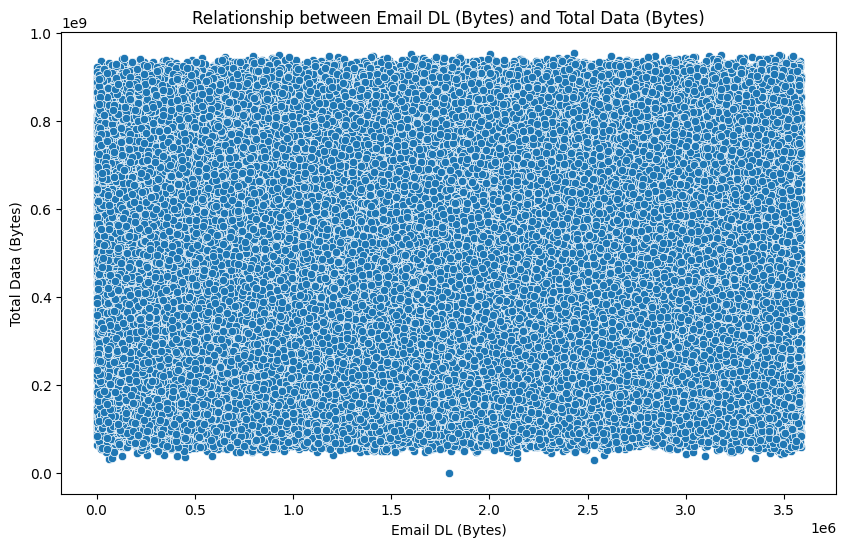

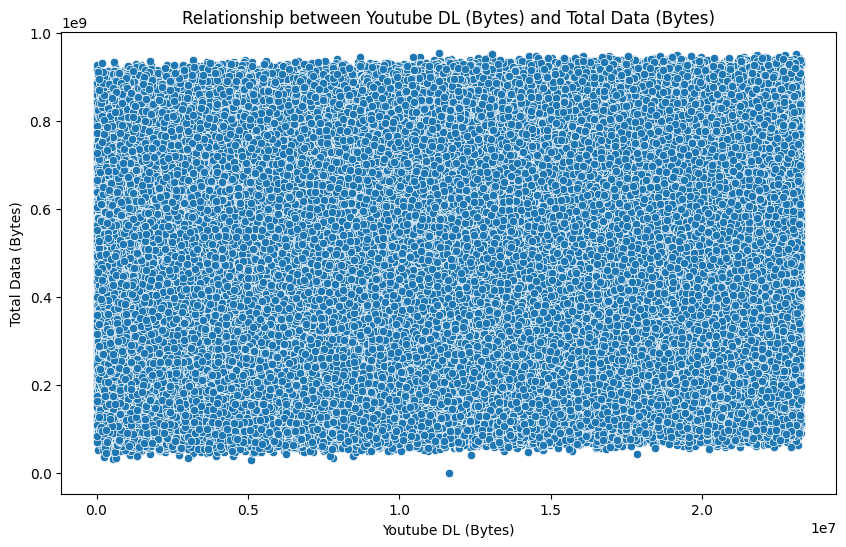

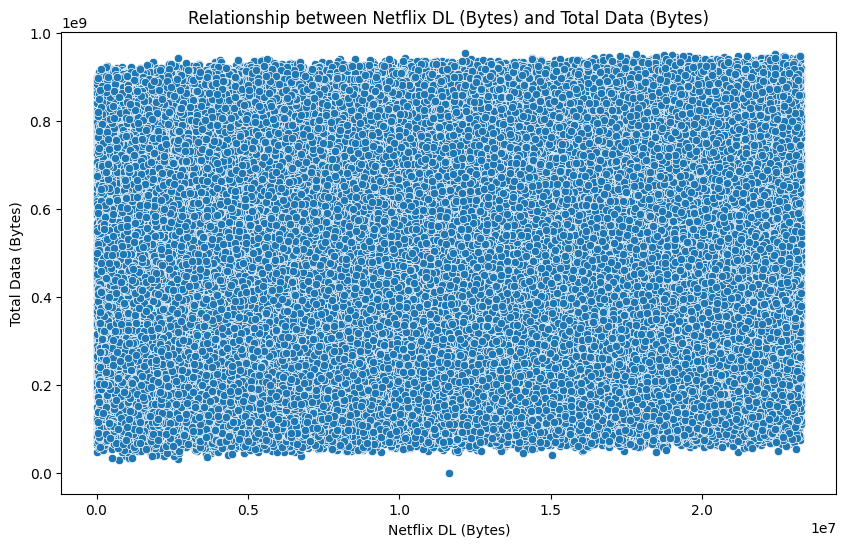

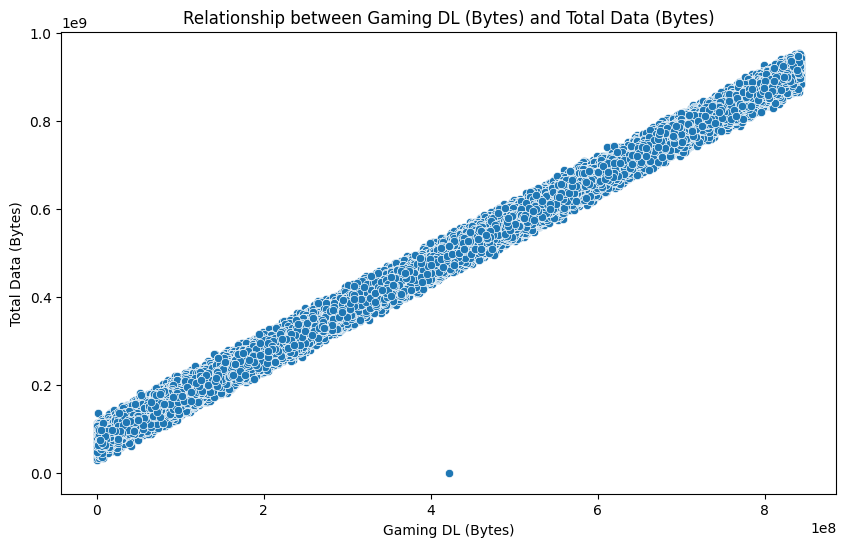

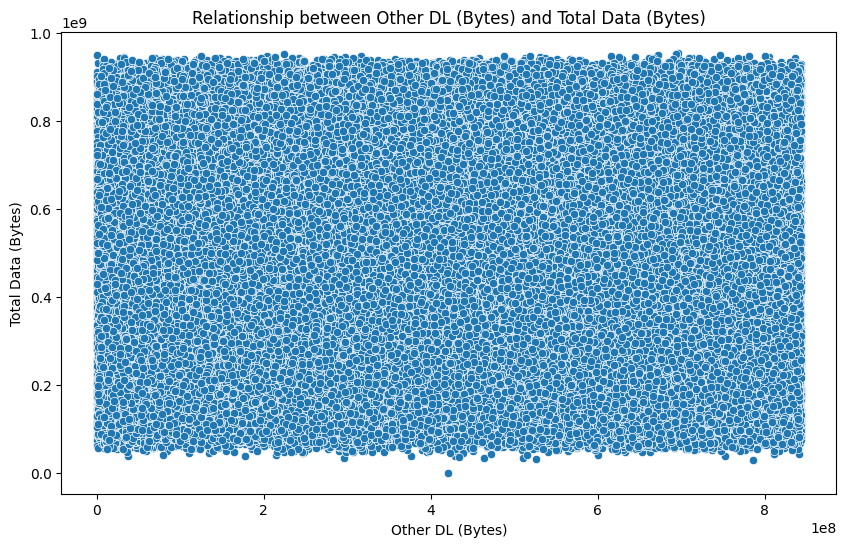

In [32]:
# Analyze the relationship between each application and total data
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
               'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

for app in app_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[app], y=df['Total Data (Bytes)'])
    plt.title(f'Relationship between {app} and Total Data (Bytes)')
    plt.xlabel(app)
    plt.ylabel('Total Data (Bytes)')
    plt.show()


## 7. Correlation Analysis


                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)                0.000050

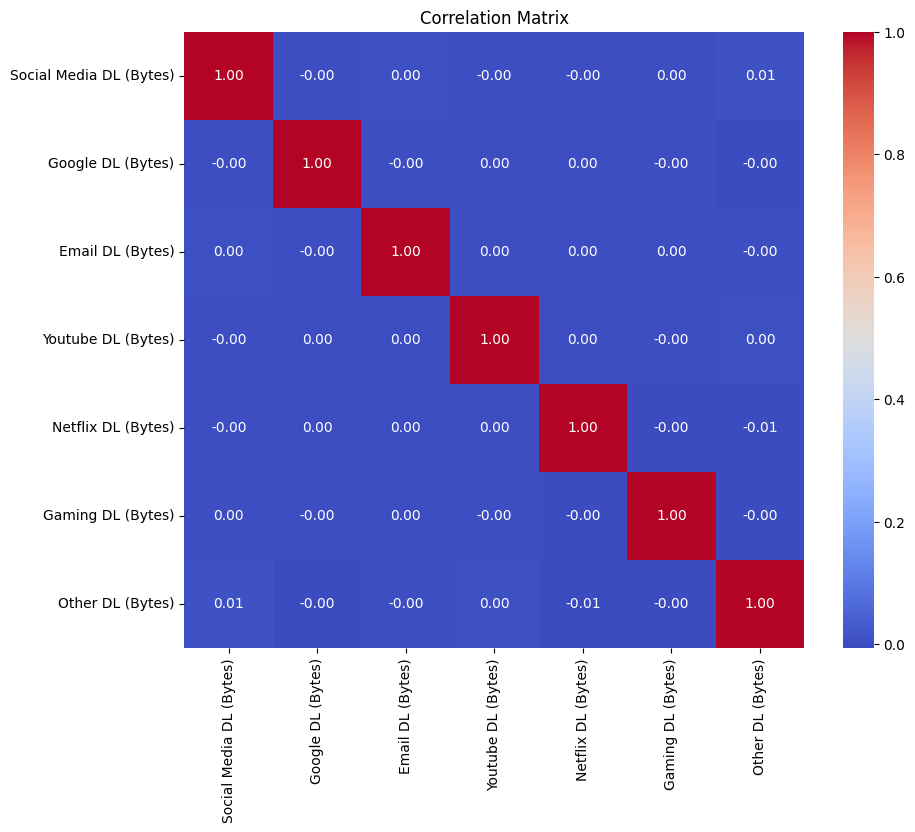

In [33]:
# Compute the correlation matrix
correlation_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                         'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
print(correlation_matrix)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 8. Dimensionality Reduction – Principal Component Analysis (PCA)


            PC1           PC2
0 -5.093513e+07 -2.833879e+08
1  1.397982e+08  1.628167e+08
2 -1.775439e+08 -7.501851e+07
3  2.440129e+08  4.364661e+08
4  5.548410e+07  1.577474e+08


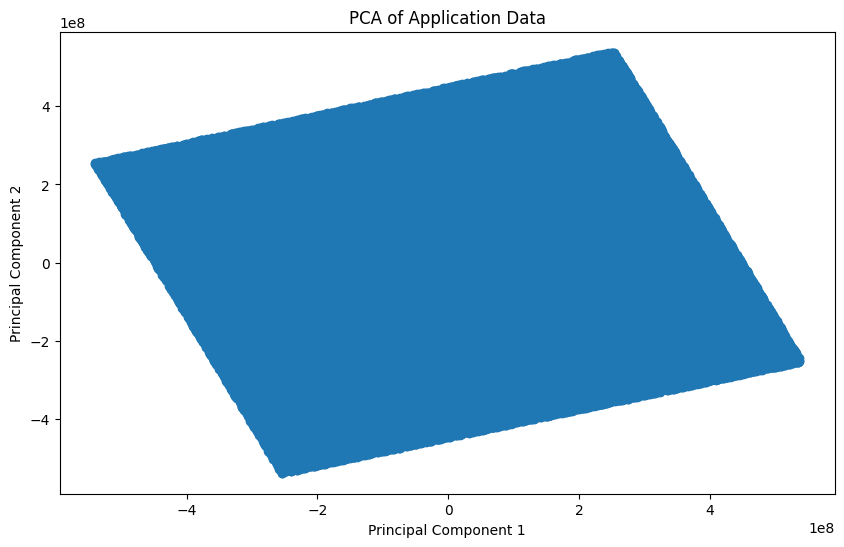

In [34]:

# Prepare data for PCA
data_for_pca = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                   'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
print(pca_df.head())

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Application Data')
plt.show()
